<a href="https://colab.research.google.com/github/samarthya04/IIIT-A-internship/blob/main/Gamma_Telescope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv("/content/drive/MyDrive/IIIT-A Internship/magic+gamma+telescope/magic04.data", names=cols)

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [6]:
df['class'] = (df['class'] == 'g').astype(int)

In [7]:
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

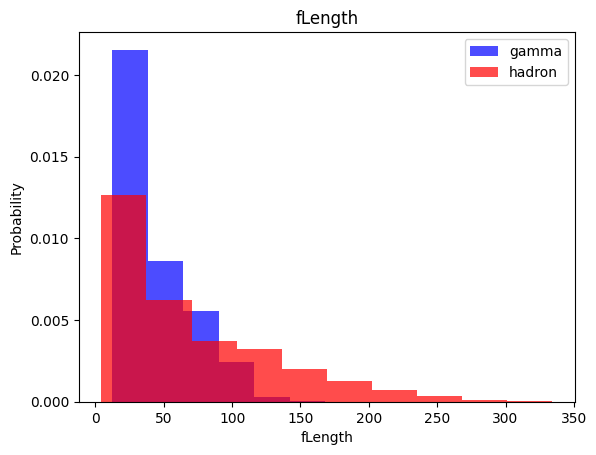

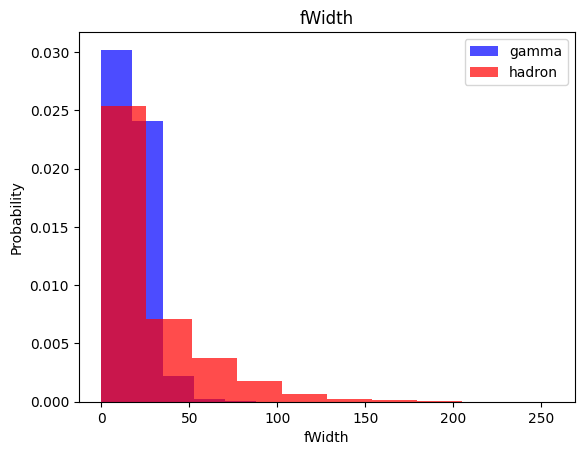

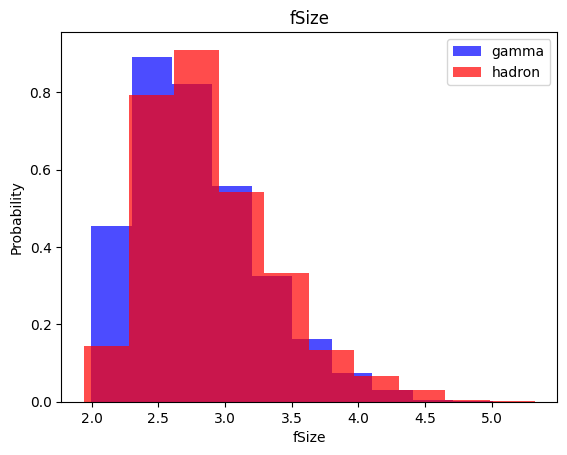

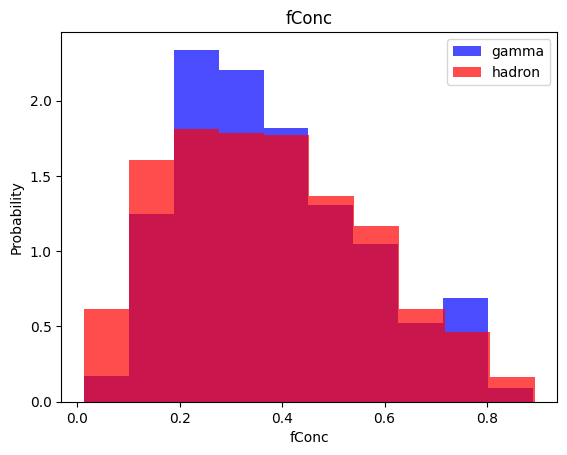

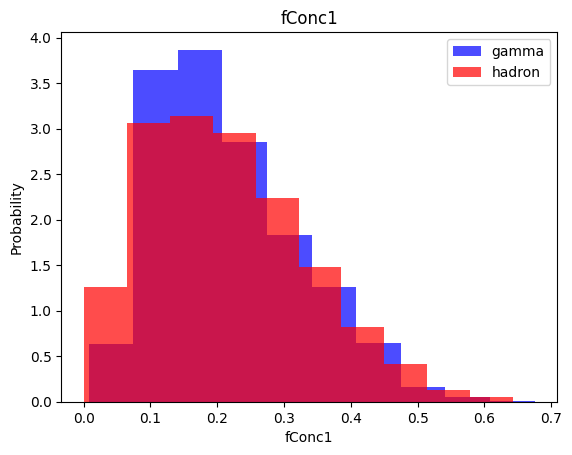

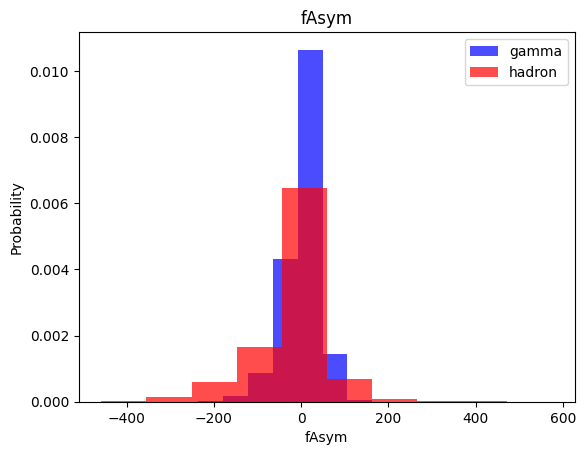

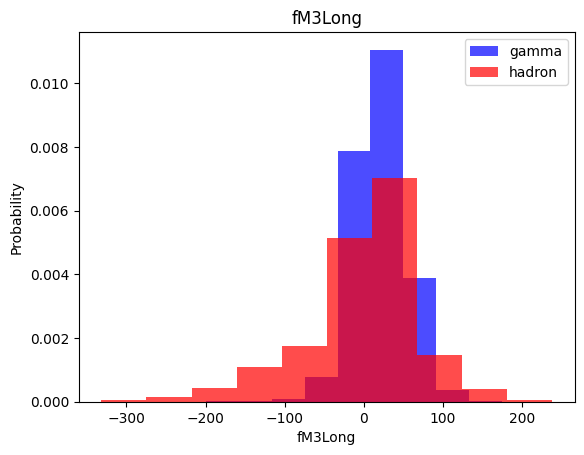

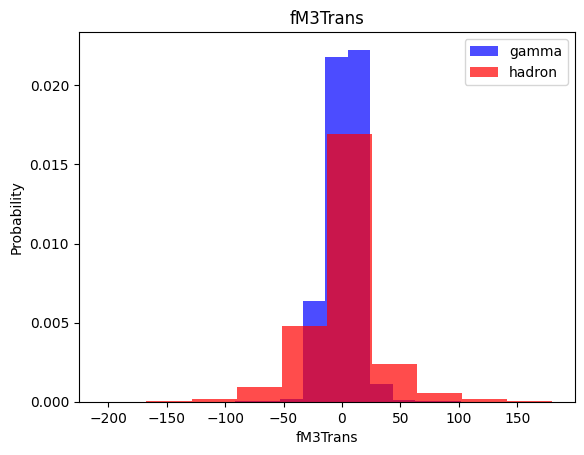

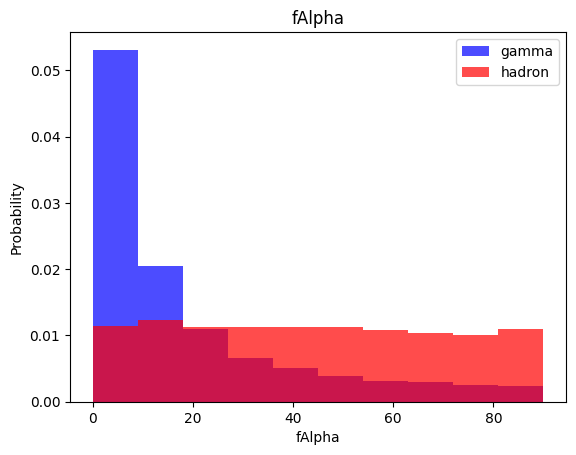

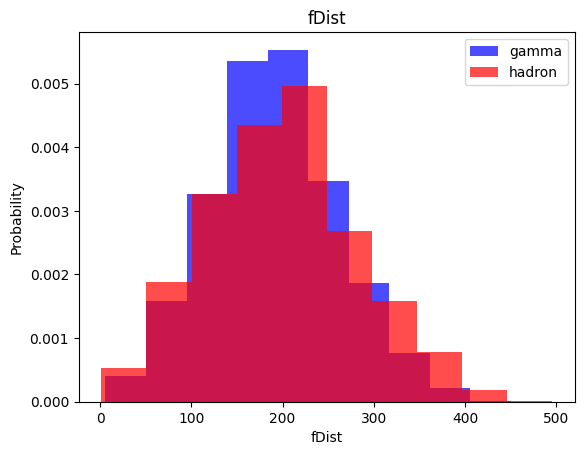

In [8]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

# Train, validation, test datasets

In [9]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [10]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y


In [11]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred_1 = knn.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1342
           1       0.85      0.87      0.86      2462

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



# Naive Bayes

In [23]:
 from sklearn.naive_bayes import GaussianNB

In [24]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [25]:
y_pred_2 = nb.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1342
           1       0.73      0.90      0.81      2462

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



# Logistic Regression


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred_3 = logr.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1342
           1       0.84      0.82      0.83      2462

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



# SVM

In [31]:
from sklearn.svm import SVC

In [32]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [33]:
y_pred_4 = svc.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1342
           1       0.89      0.90      0.89      2462

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Network

In [35]:
import tensorflow as tf

In [67]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)
  plt.show()


In [78]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn.fit(
     X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid), verbose=0
  )

  return nn, history

16 nodes, dropout 0, Learing rate 0.01, batch size 32


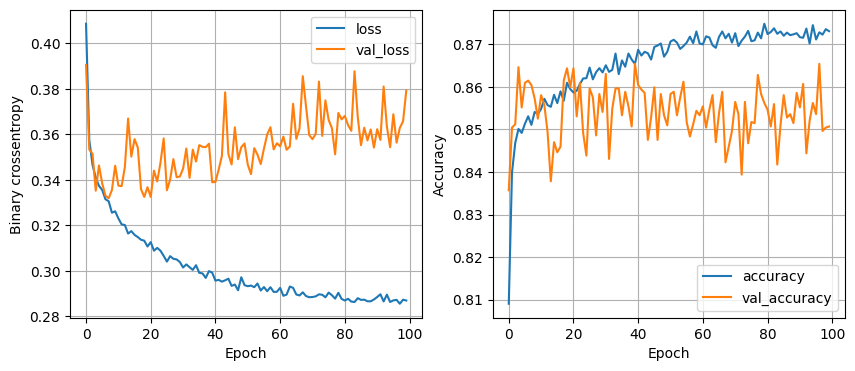

119/119 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8507
16 nodes, dropout 0, Learing rate 0.01, batch size 64


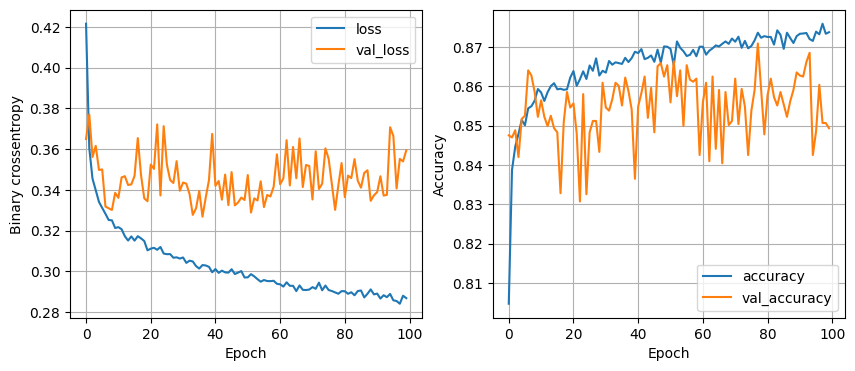

119/119 [==============================] - 0s 3ms/step - loss: 0.3594 - accuracy: 0.8494
16 nodes, dropout 0, Learing rate 0.01, batch size 128


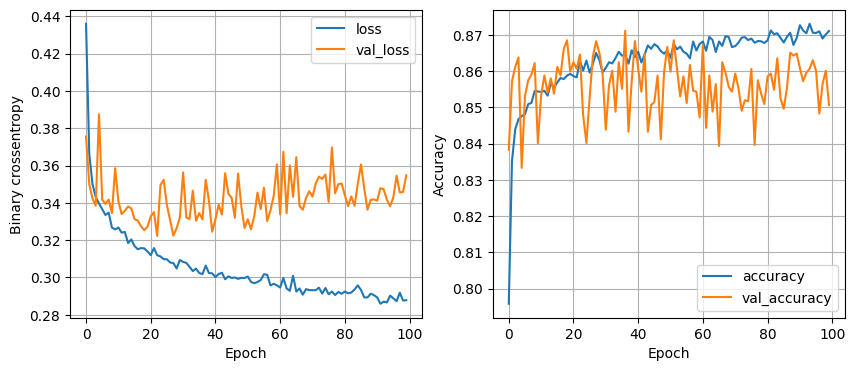

119/119 [==============================] - 0s 2ms/step - loss: 0.3548 - accuracy: 0.8507
16 nodes, dropout 0, Learing rate 0.005, batch size 32


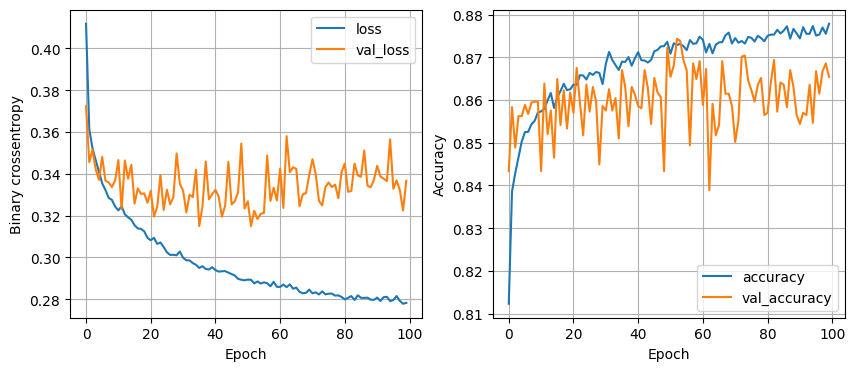

119/119 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8654
16 nodes, dropout 0, Learing rate 0.005, batch size 64


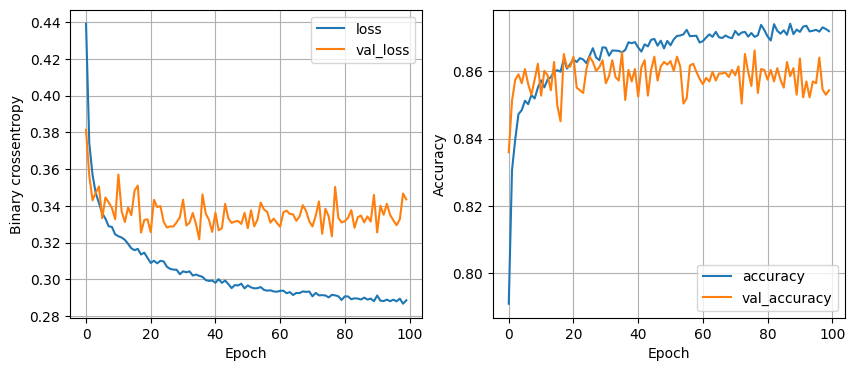

119/119 [==============================] - 0s 3ms/step - loss: 0.3435 - accuracy: 0.8544
16 nodes, dropout 0, Learing rate 0.005, batch size 128


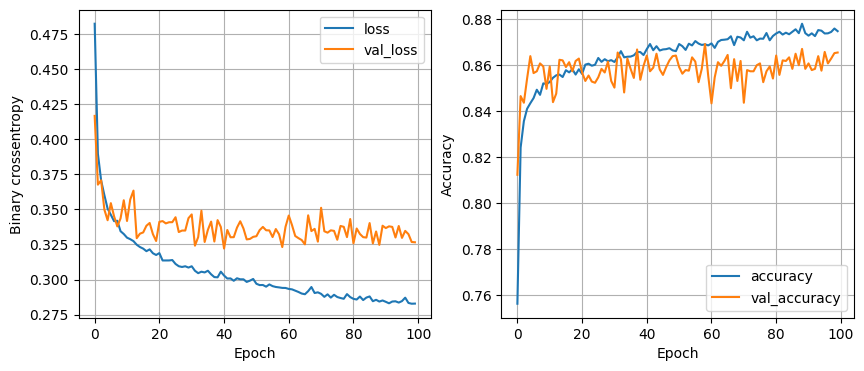

119/119 [==============================] - 0s 3ms/step - loss: 0.3266 - accuracy: 0.8654
16 nodes, dropout 0, Learing rate 0.001, batch size 32


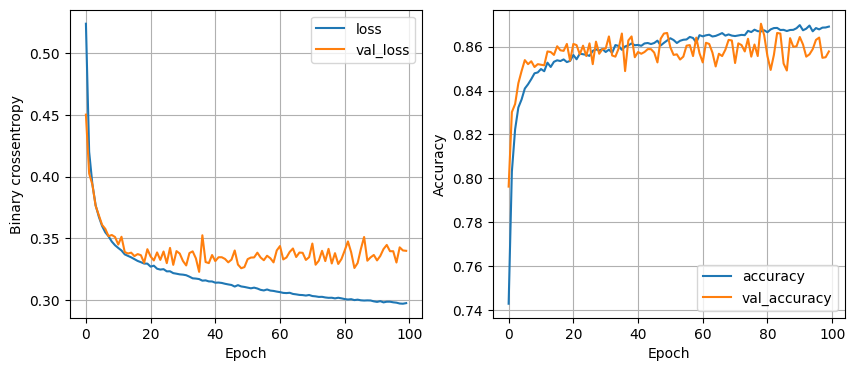

119/119 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.8578
16 nodes, dropout 0, Learing rate 0.001, batch size 64


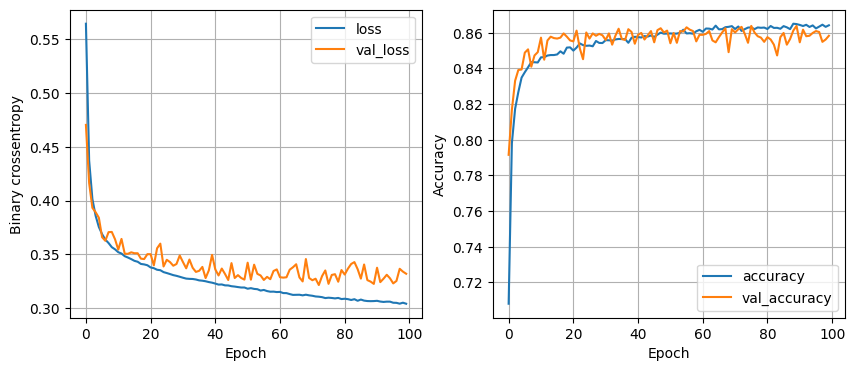

119/119 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8583
16 nodes, dropout 0, Learing rate 0.001, batch size 128


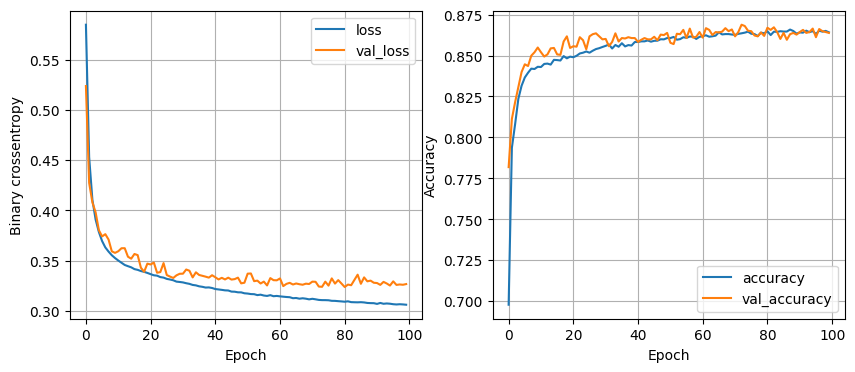

119/119 [==============================] - 0s 2ms/step - loss: 0.3267 - accuracy: 0.8638
16 nodes, dropout 0.2, Learing rate 0.01, batch size 32


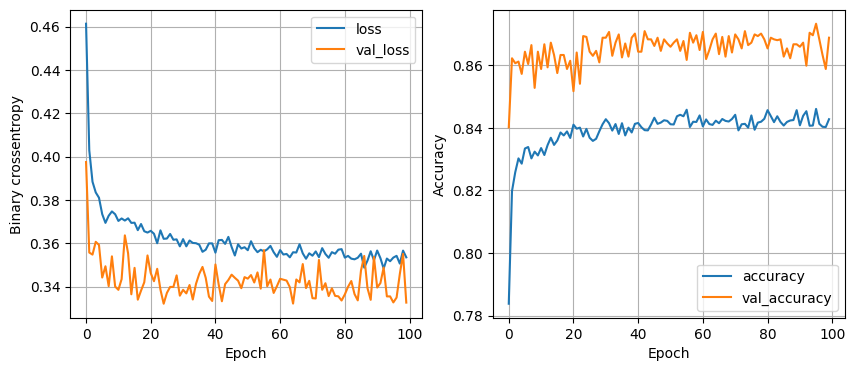

119/119 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8688
16 nodes, dropout 0.2, Learing rate 0.01, batch size 64


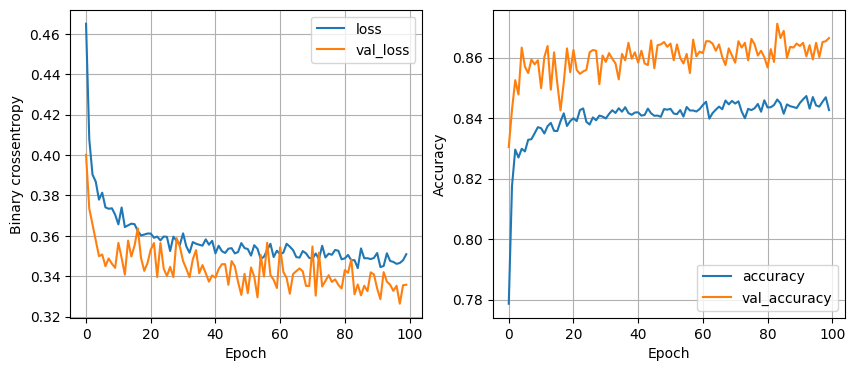

119/119 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8665
16 nodes, dropout 0.2, Learing rate 0.01, batch size 128


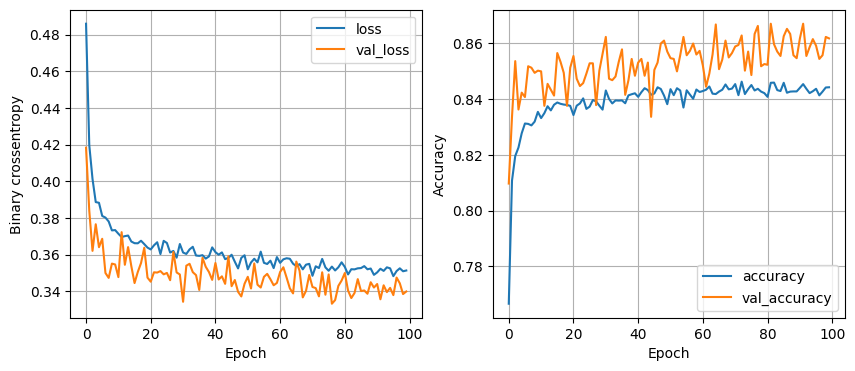

119/119 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8617
16 nodes, dropout 0.2, Learing rate 0.005, batch size 32


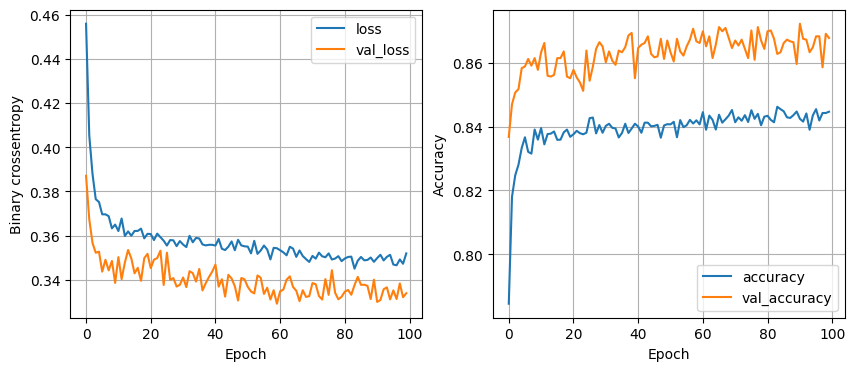

119/119 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8678
16 nodes, dropout 0.2, Learing rate 0.005, batch size 64


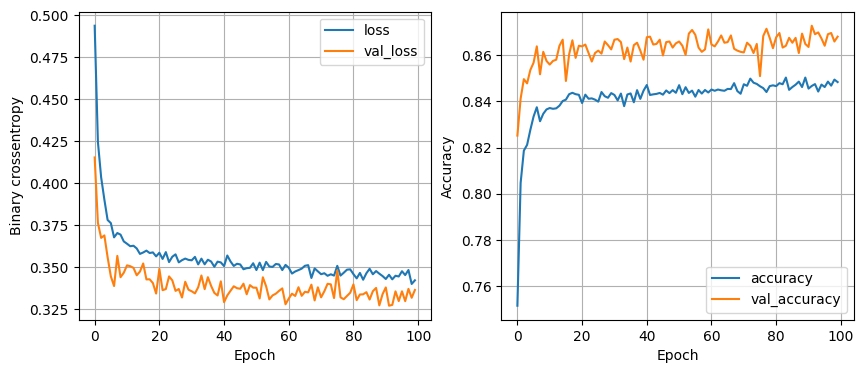

119/119 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8680
16 nodes, dropout 0.2, Learing rate 0.005, batch size 128


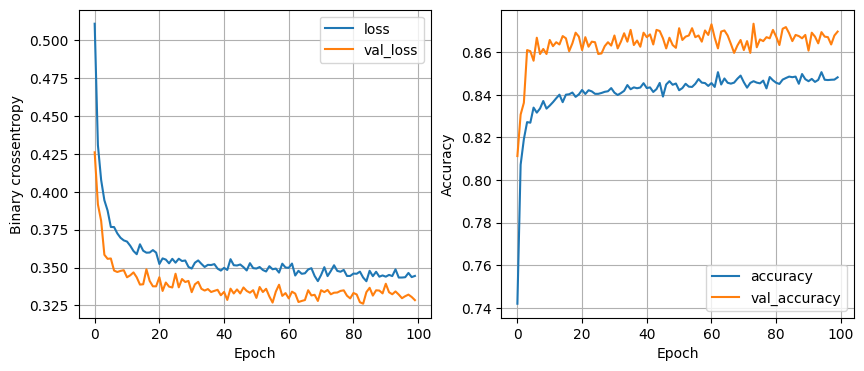

119/119 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8696
16 nodes, dropout 0.2, Learing rate 0.001, batch size 32


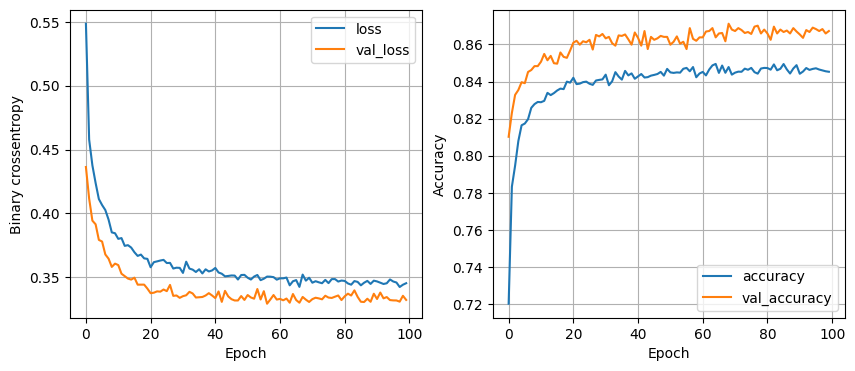

119/119 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8672
16 nodes, dropout 0.2, Learing rate 0.001, batch size 64


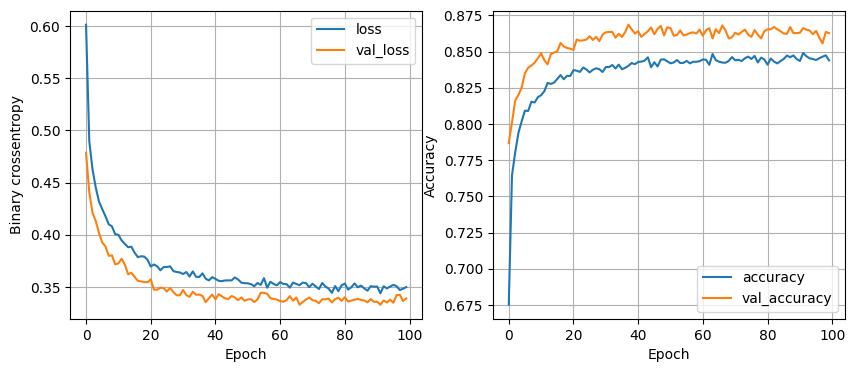

119/119 [==============================] - 0s 2ms/step - loss: 0.3390 - accuracy: 0.8628
16 nodes, dropout 0.2, Learing rate 0.001, batch size 128


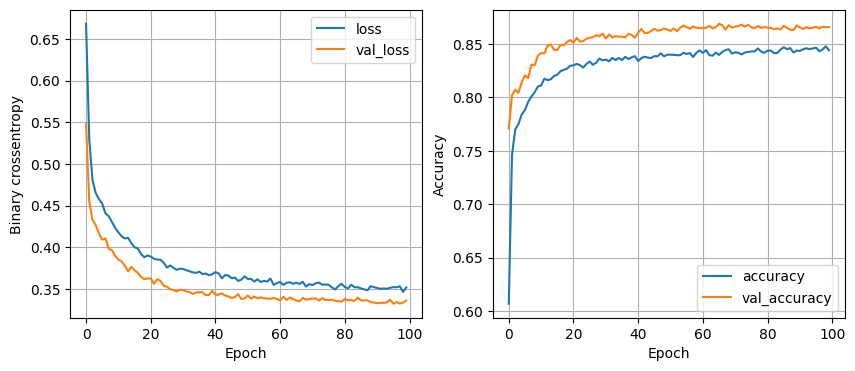

119/119 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8659
32 nodes, dropout 0, Learing rate 0.01, batch size 32


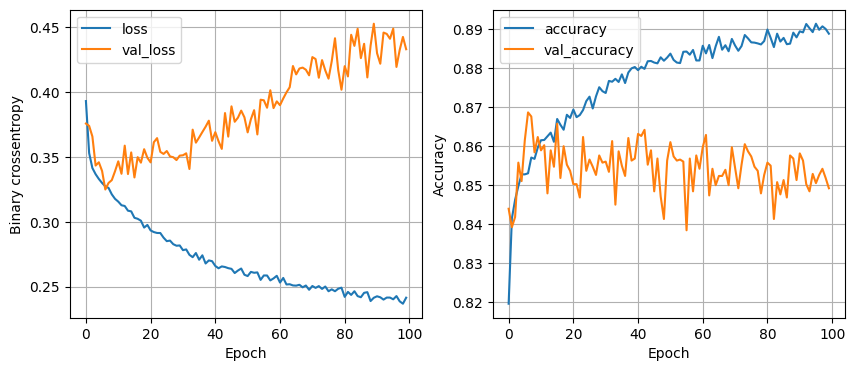

119/119 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.8491
32 nodes, dropout 0, Learing rate 0.01, batch size 64


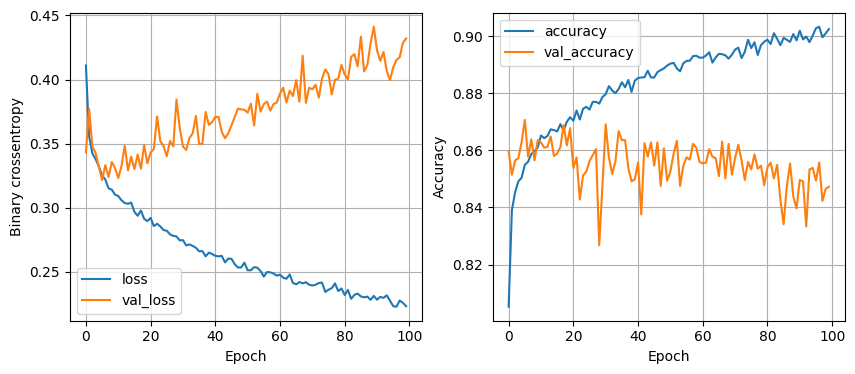

119/119 [==============================] - 0s 2ms/step - loss: 0.4322 - accuracy: 0.8473
32 nodes, dropout 0, Learing rate 0.01, batch size 128


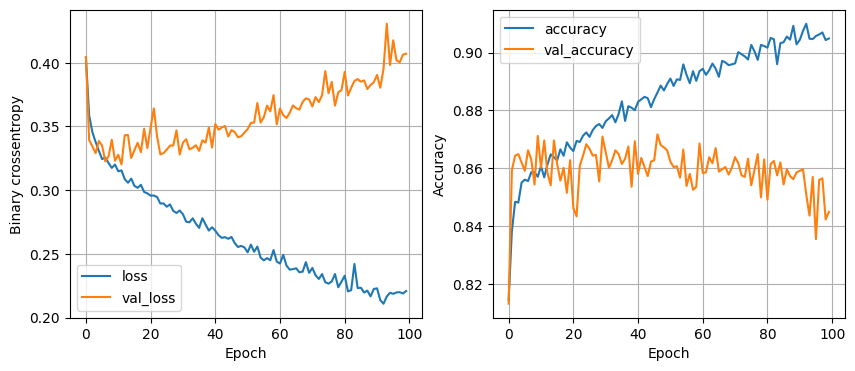

119/119 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8449
32 nodes, dropout 0, Learing rate 0.005, batch size 32


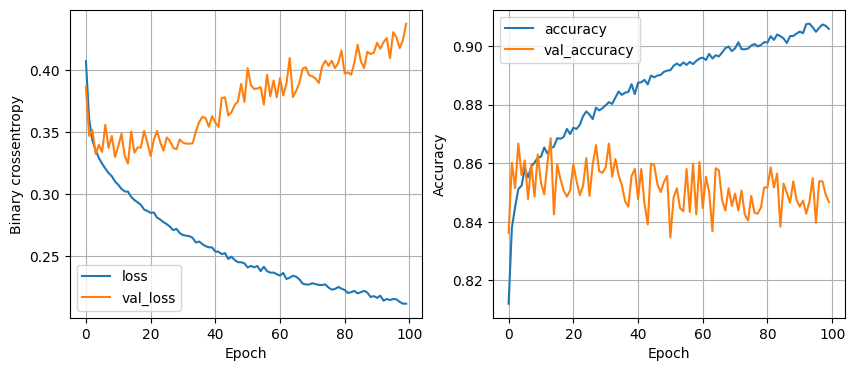

119/119 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.8467
32 nodes, dropout 0, Learing rate 0.005, batch size 64


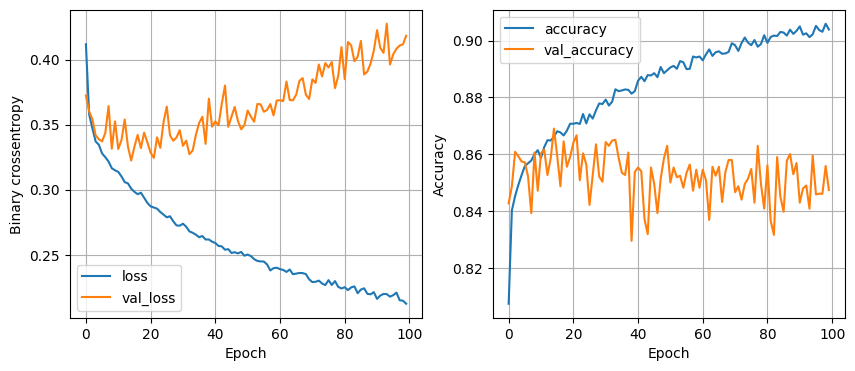

119/119 [==============================] - 1s 8ms/step - loss: 0.4182 - accuracy: 0.8475
32 nodes, dropout 0, Learing rate 0.005, batch size 128


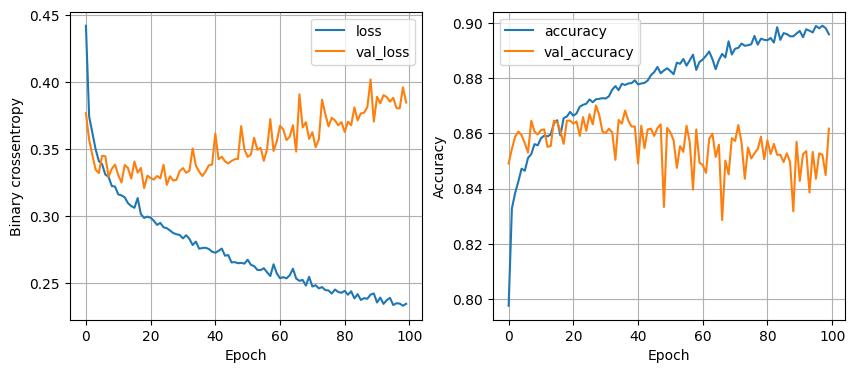

119/119 [==============================] - 0s 2ms/step - loss: 0.3848 - accuracy: 0.8617
32 nodes, dropout 0, Learing rate 0.001, batch size 32


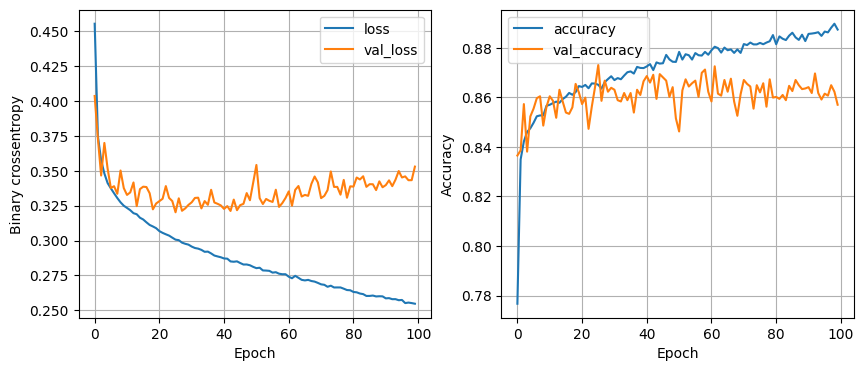

119/119 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8570
32 nodes, dropout 0, Learing rate 0.001, batch size 64


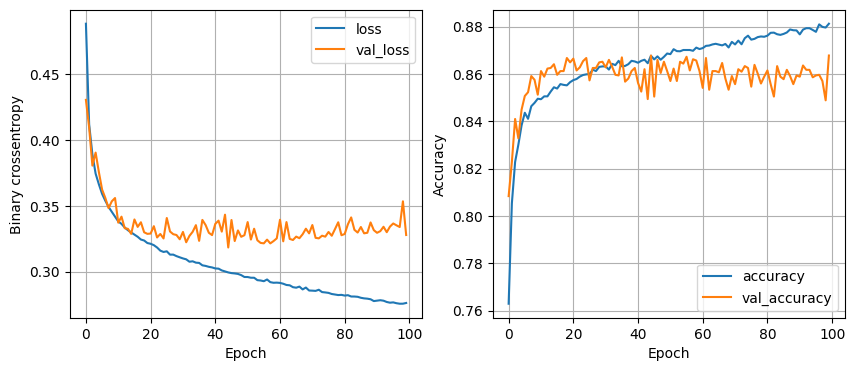

119/119 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8678
32 nodes, dropout 0, Learing rate 0.001, batch size 128


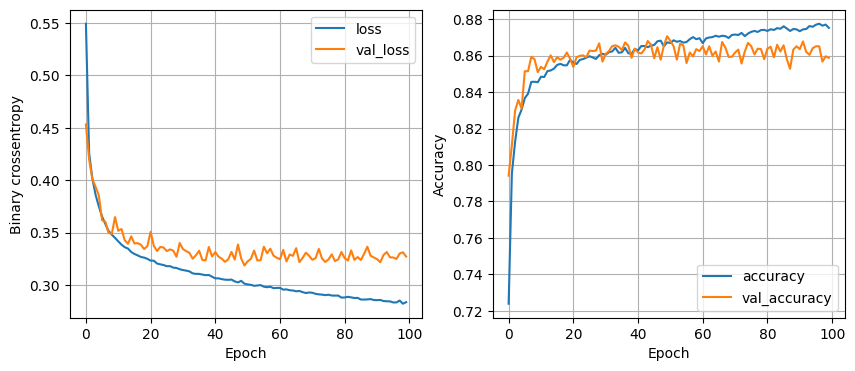

119/119 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8588
32 nodes, dropout 0.2, Learing rate 0.01, batch size 32


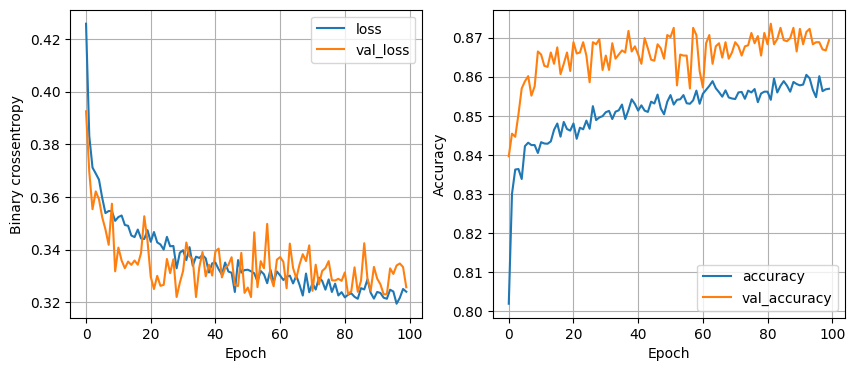

119/119 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8693
32 nodes, dropout 0.2, Learing rate 0.01, batch size 64


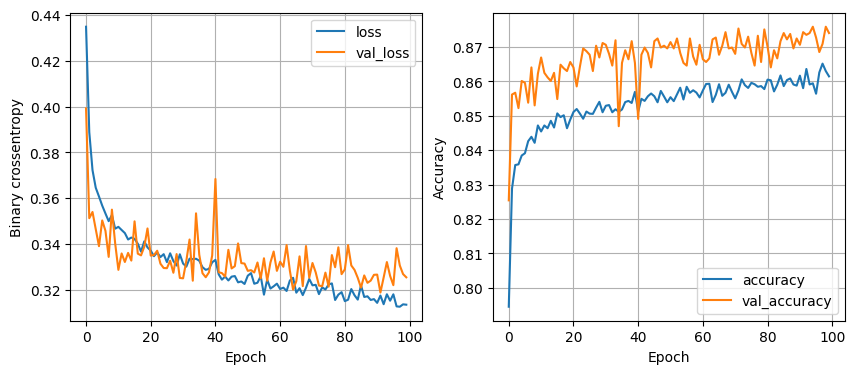

119/119 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8741
32 nodes, dropout 0.2, Learing rate 0.01, batch size 128


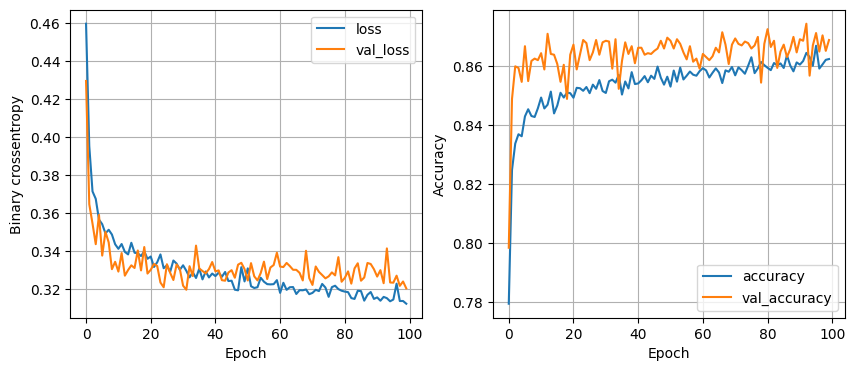

119/119 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8688
32 nodes, dropout 0.2, Learing rate 0.005, batch size 32


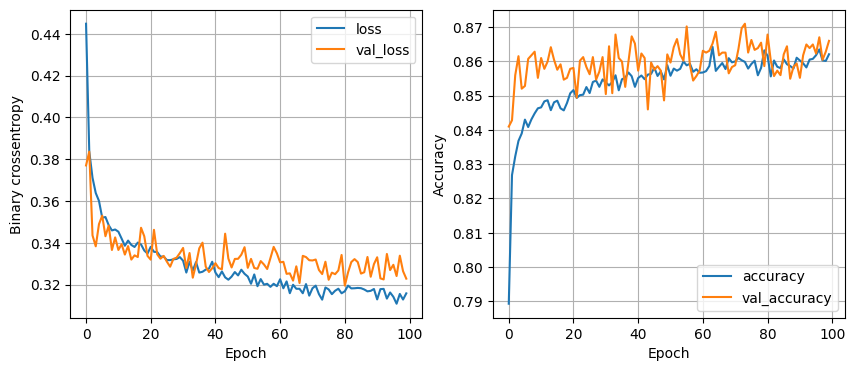

119/119 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.8659
32 nodes, dropout 0.2, Learing rate 0.005, batch size 64


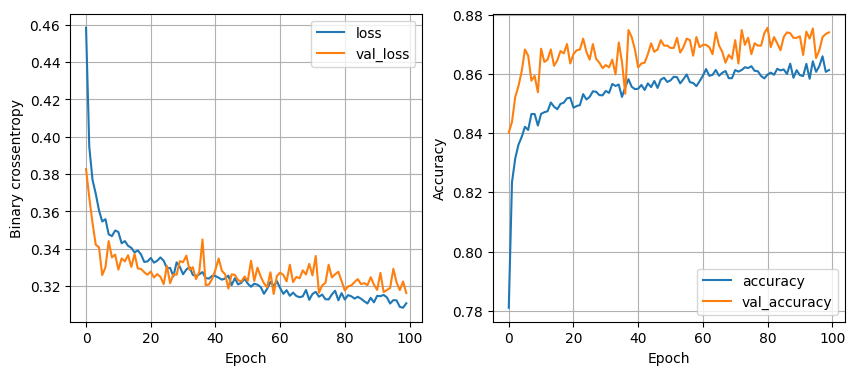

119/119 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.8741
32 nodes, dropout 0.2, Learing rate 0.005, batch size 128


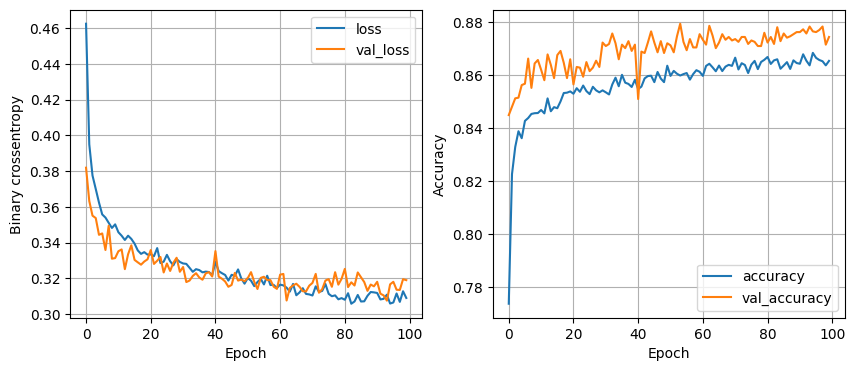

119/119 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8743
32 nodes, dropout 0.2, Learing rate 0.001, batch size 32


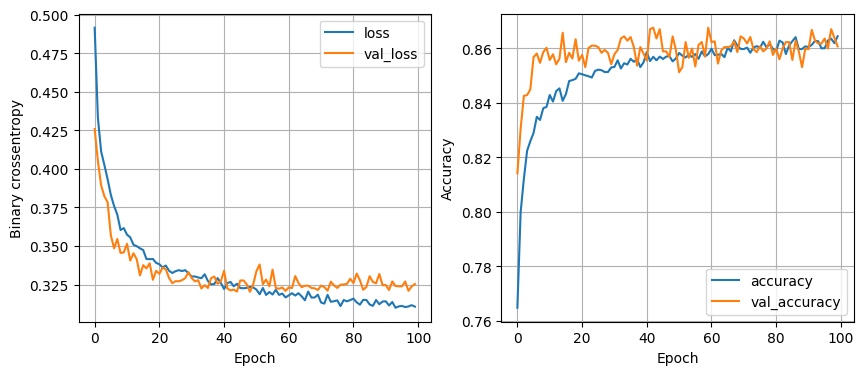

119/119 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8607
32 nodes, dropout 0.2, Learing rate 0.001, batch size 64


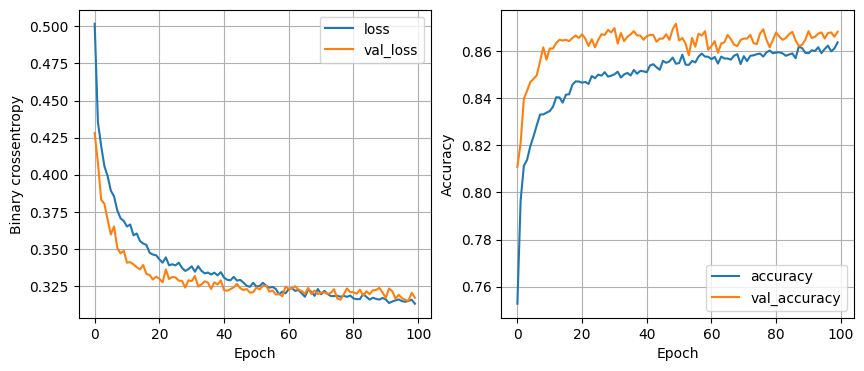

119/119 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8680
32 nodes, dropout 0.2, Learing rate 0.001, batch size 128


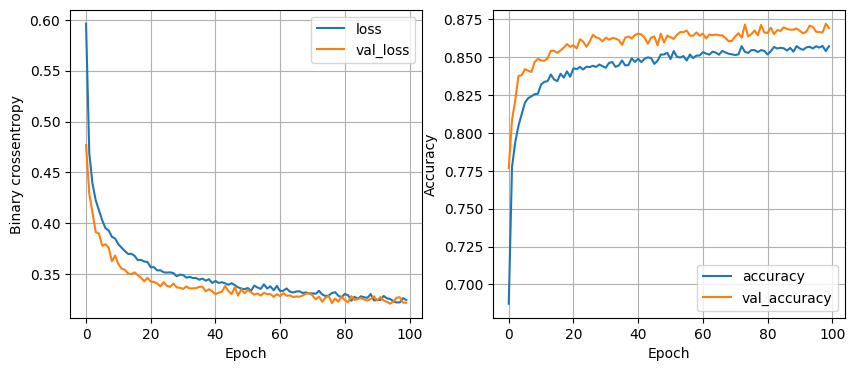

119/119 [==============================] - 0s 2ms/step - loss: 0.3219 - accuracy: 0.8691
64 nodes, dropout 0, Learing rate 0.01, batch size 32


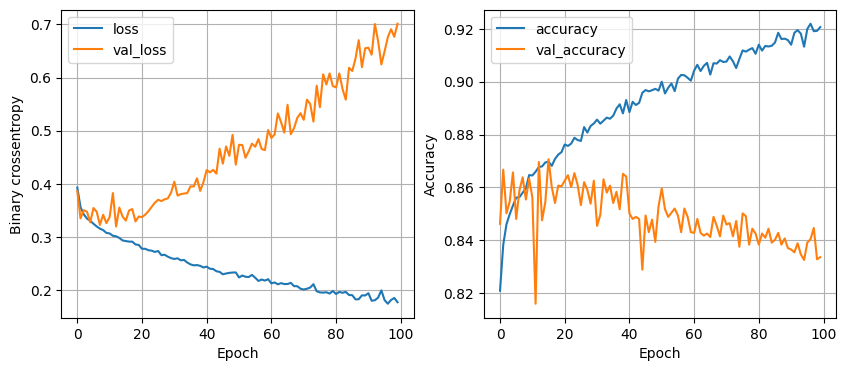

119/119 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.8336
64 nodes, dropout 0, Learing rate 0.01, batch size 64


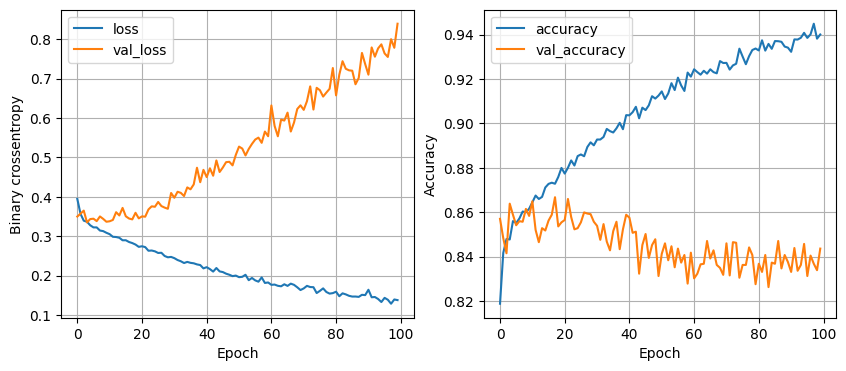

119/119 [==============================] - 0s 2ms/step - loss: 0.8394 - accuracy: 0.8436
64 nodes, dropout 0, Learing rate 0.01, batch size 128


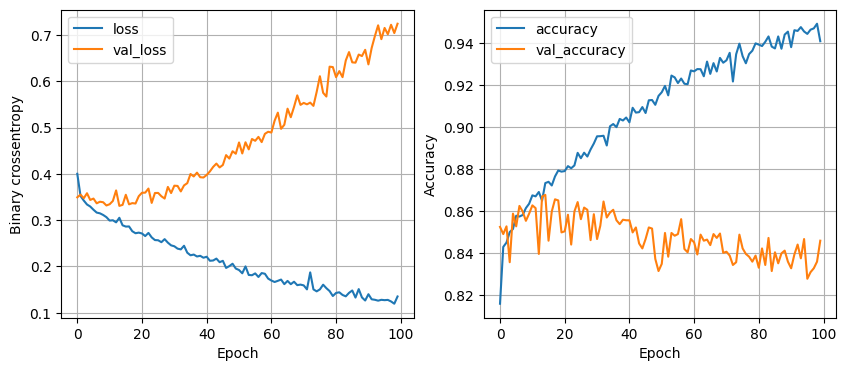

119/119 [==============================] - 0s 2ms/step - loss: 0.7247 - accuracy: 0.8460
64 nodes, dropout 0, Learing rate 0.005, batch size 32


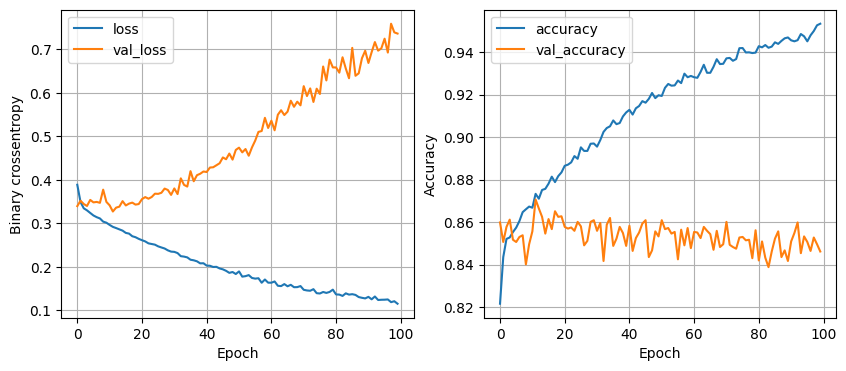

119/119 [==============================] - 0s 2ms/step - loss: 0.7365 - accuracy: 0.8462
64 nodes, dropout 0, Learing rate 0.005, batch size 64


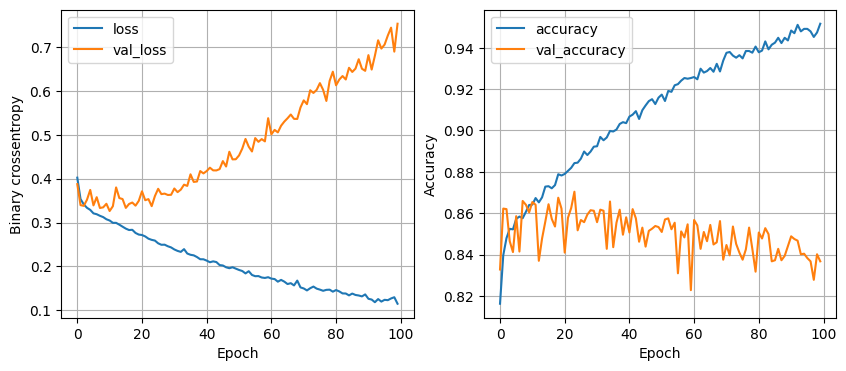

119/119 [==============================] - 0s 2ms/step - loss: 0.7533 - accuracy: 0.8368
64 nodes, dropout 0, Learing rate 0.005, batch size 128


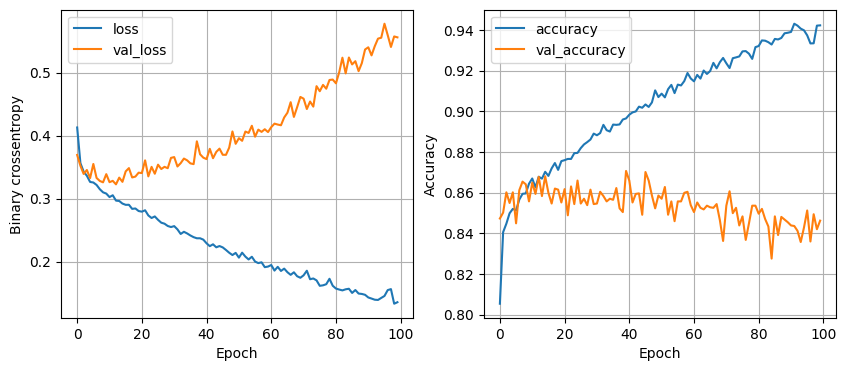

119/119 [==============================] - 0s 2ms/step - loss: 0.5560 - accuracy: 0.8462
64 nodes, dropout 0, Learing rate 0.001, batch size 32


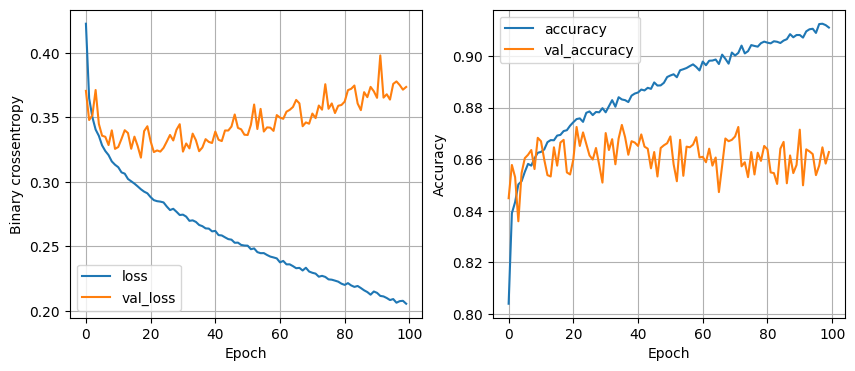

119/119 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.8628
64 nodes, dropout 0, Learing rate 0.001, batch size 64


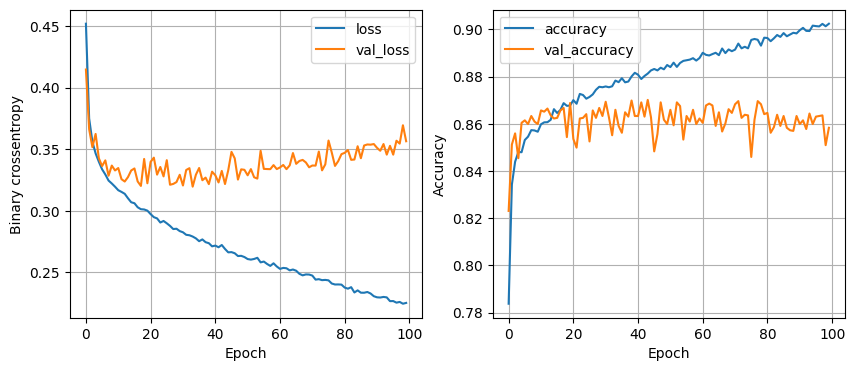

119/119 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8583
64 nodes, dropout 0, Learing rate 0.001, batch size 128


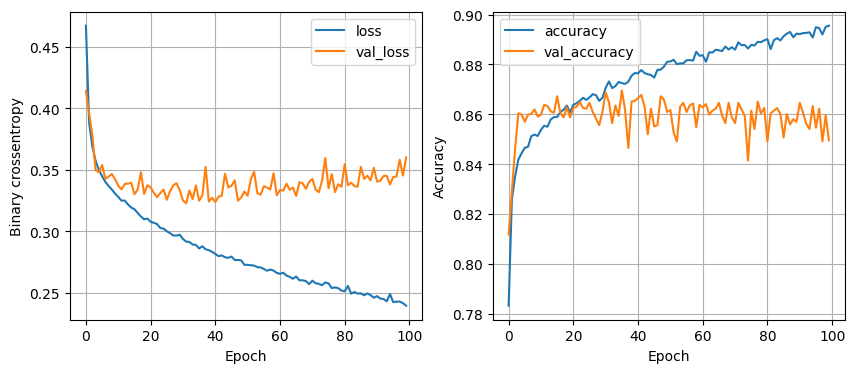

119/119 [==============================] - 0s 2ms/step - loss: 0.3599 - accuracy: 0.8496
64 nodes, dropout 0.2, Learing rate 0.01, batch size 32


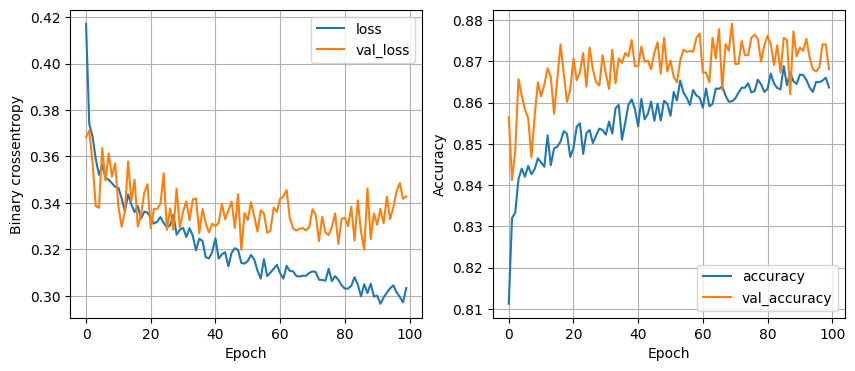

119/119 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8680
64 nodes, dropout 0.2, Learing rate 0.01, batch size 64


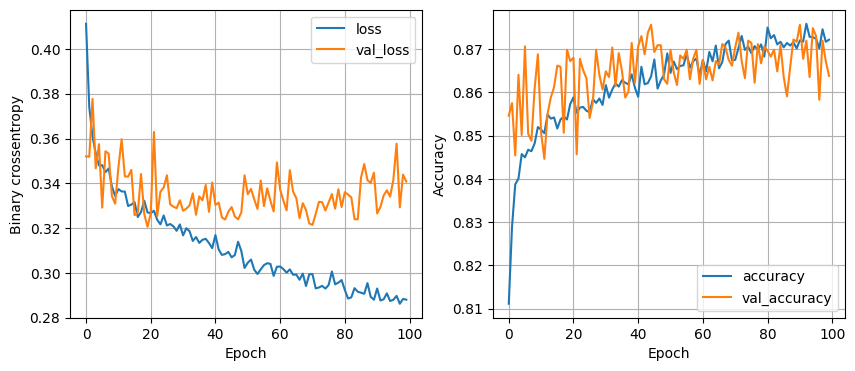

119/119 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8638
64 nodes, dropout 0.2, Learing rate 0.01, batch size 128


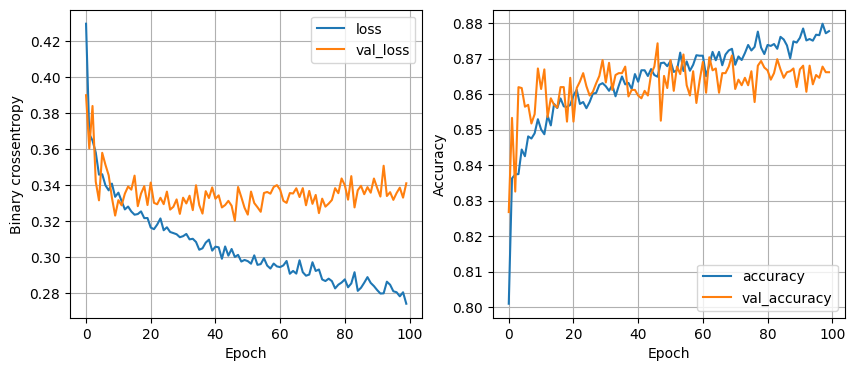

119/119 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8662
64 nodes, dropout 0.2, Learing rate 0.005, batch size 32


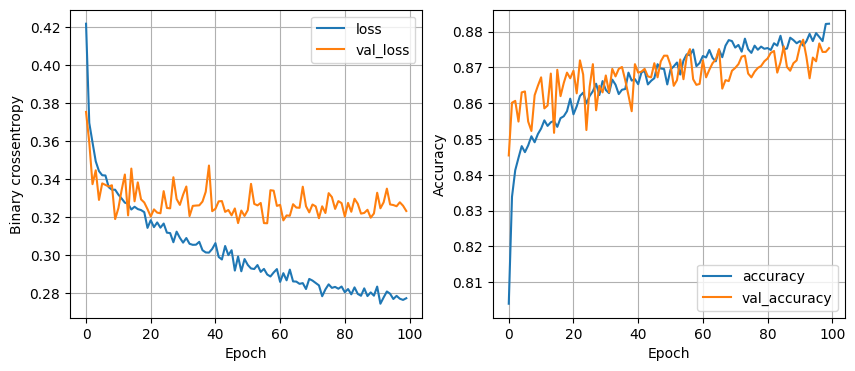

119/119 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8754
64 nodes, dropout 0.2, Learing rate 0.005, batch size 64


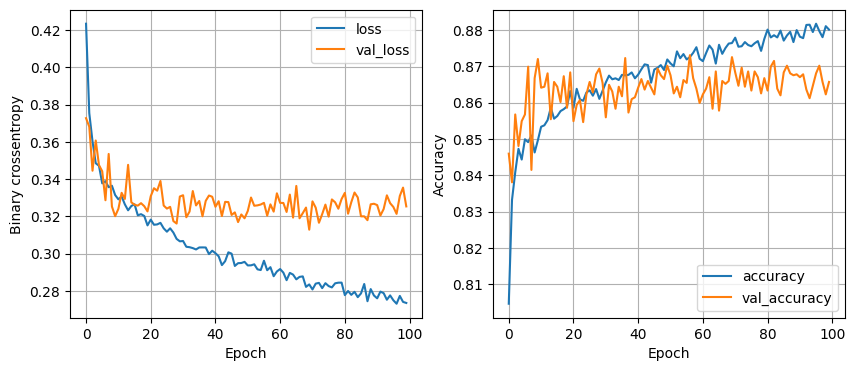

119/119 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8657
64 nodes, dropout 0.2, Learing rate 0.005, batch size 128


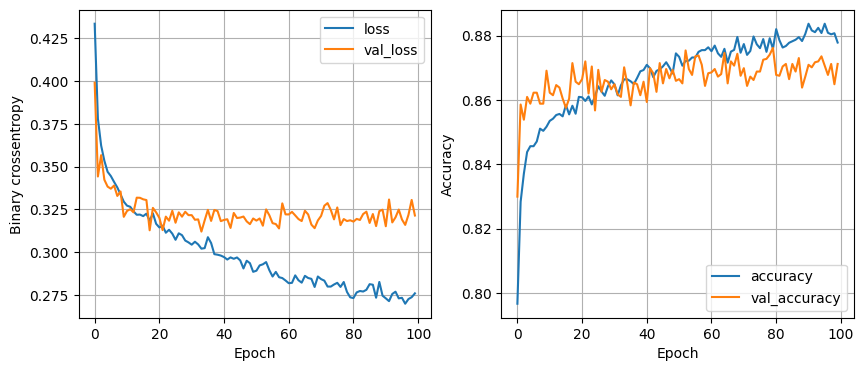

119/119 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8712
64 nodes, dropout 0.2, Learing rate 0.001, batch size 32


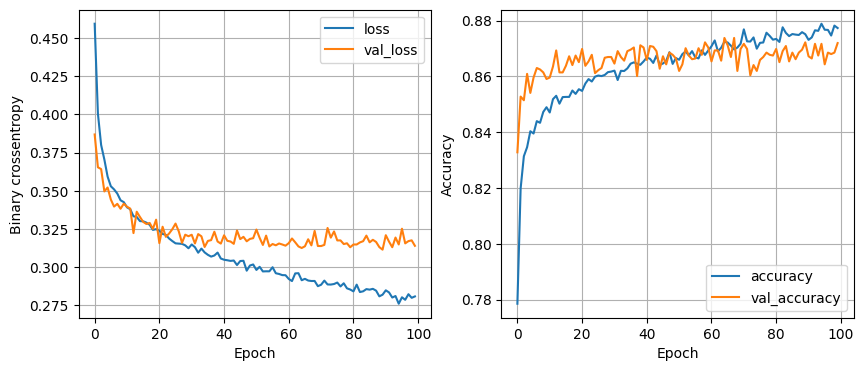

119/119 [==============================] - 0s 2ms/step - loss: 0.3140 - accuracy: 0.8720
64 nodes, dropout 0.2, Learing rate 0.001, batch size 64


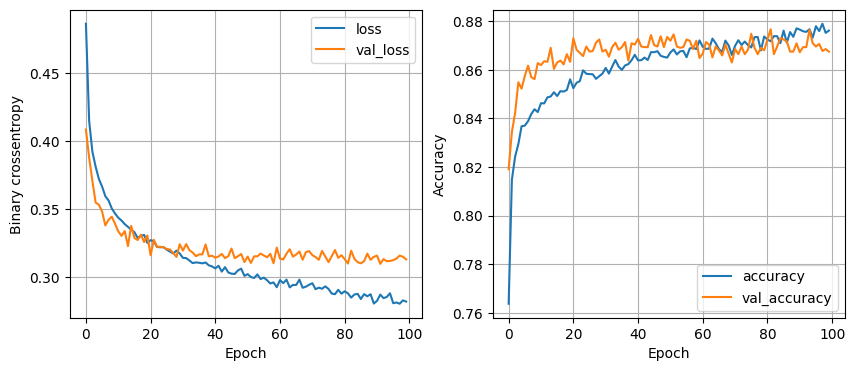

119/119 [==============================] - 0s 3ms/step - loss: 0.3133 - accuracy: 0.8675
64 nodes, dropout 0.2, Learing rate 0.001, batch size 128


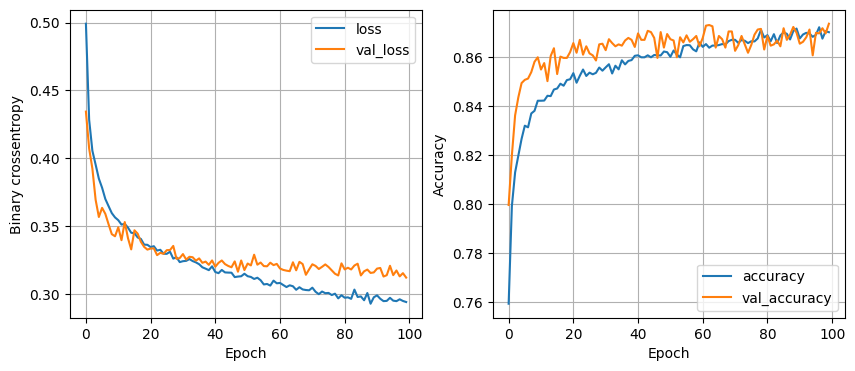

119/119 [==============================] - 1s 10ms/step - loss: 0.3121 - accuracy: 0.8736


In [79]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in (16, 32, 64):
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, Learing rate {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [84]:
y_pred_5 = least_loss_model.predict(X_test)
y_pred_5 = (y_pred_5 > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [85]:
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1342
           1       0.90      0.90      0.90      2462

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804

